In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('02_medical_records.csv')

In [3]:
df_test = df.iloc[:10]
df_train = df.iloc[10:] 

In [4]:
df_train.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
12,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
14,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0


In [5]:
df_test.head()

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Exploratory data analysis(EDA)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 10 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              908 non-null    int64  
 1   gender           908 non-null    object 
 2   chest_pain       908 non-null    object 
 3   resting_BP       908 non-null    int64  
 4   cholesterol      908 non-null    int64  
 5   fasting_BS       908 non-null    int64  
 6   resting_ECG      908 non-null    object 
 7   max_HR           908 non-null    int64  
 8   exercise_angina  908 non-null    object 
 9   old_peak         908 non-null    float64
 10  ST_slope         908 non-null    object 
 11  cv_issue         908 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 85.3+ KB


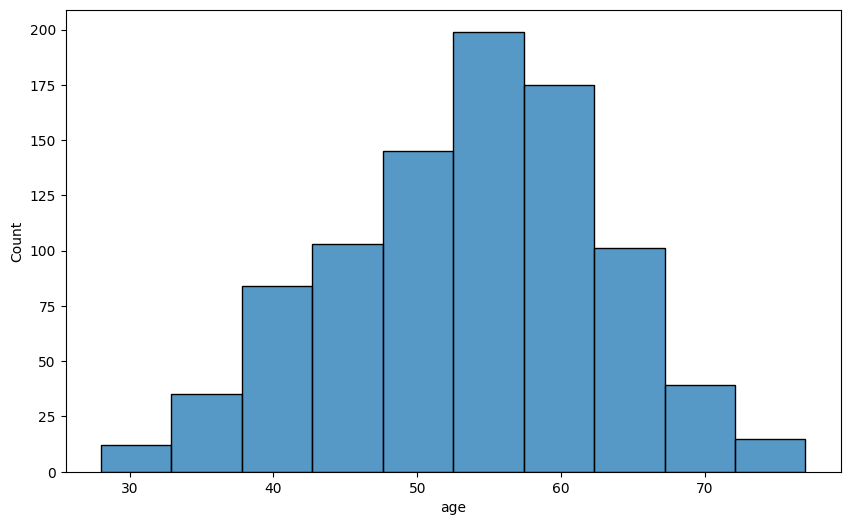

In [7]:
plt.figure(figsize=(10, 6)) 
ax_stars=sns.histplot(df_train['age'], bins=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

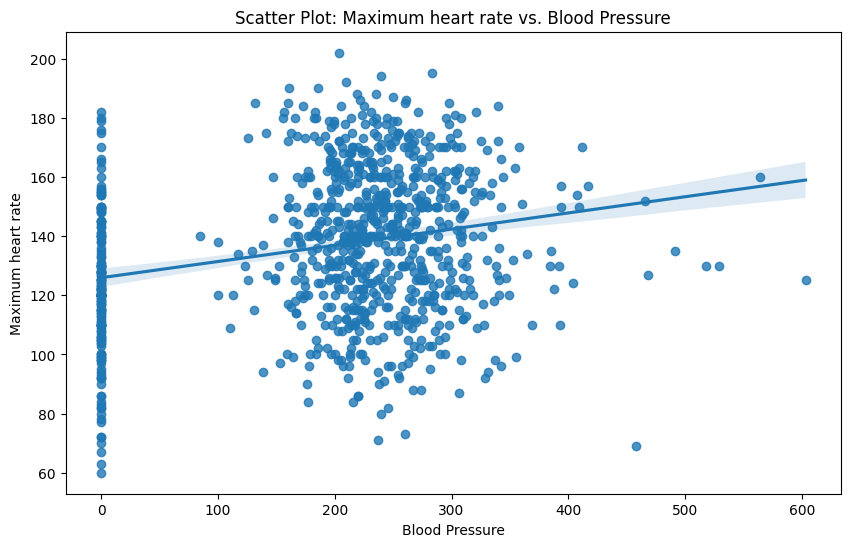

In [8]:
plt.figure(figsize=(10, 6)) 
sns.regplot(y=df_train['max_HR'],x=df_train['cholesterol'],data=df_train)
plt.title('Scatter Plot: Maximum heart rate vs. Blood Pressure')
plt.ylabel('Maximum heart rate')
plt.xlabel('Blood Pressure')
plt.show()

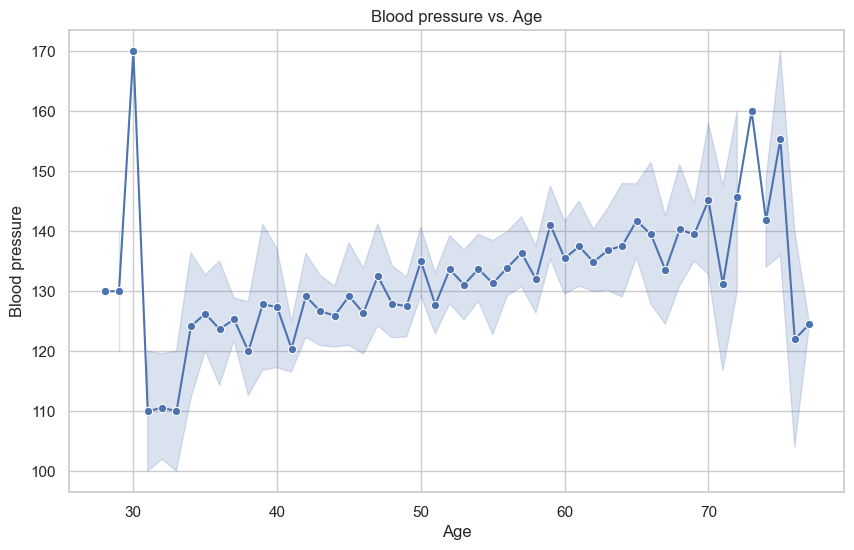

In [9]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df_train, x="age", y="resting_BP", marker="o")
plt.title("Blood pressure vs. Age")
plt.xlabel("Age")
plt.ylabel("Blood pressure")
plt.show()

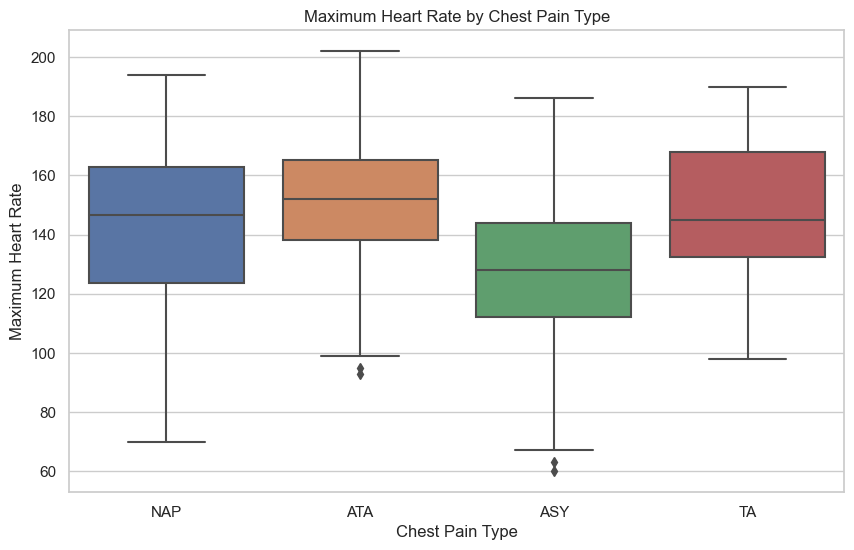

In [10]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df_train, x="chest_pain", y="max_HR")
plt.title("Maximum Heart Rate by Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Maximum Heart Rate")
plt.show()

<Axes: ylabel='chest_pain'>

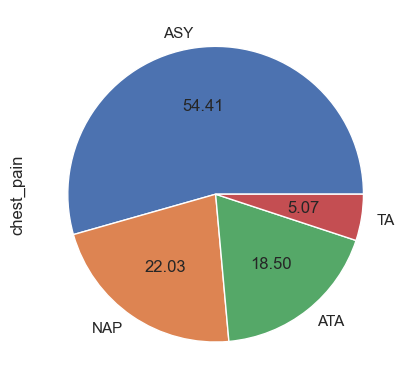

In [11]:
df_train["chest_pain"].value_counts().plot.pie(autopct='%.2f')

C:\Users\siddarth\AppData\Local\Temp\ipykernel_22136\1234912322.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


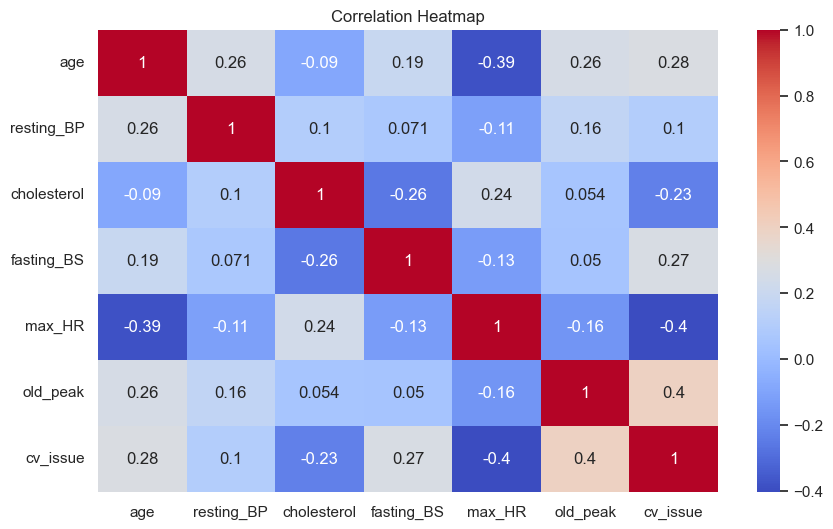

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style="white")
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

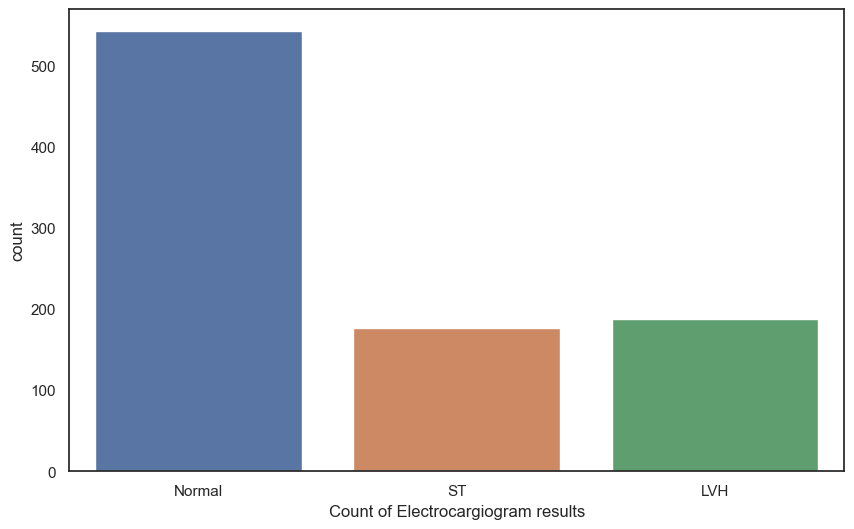

In [13]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df_train,x='resting_ECG')

plt.xlabel('Count of Electrocargiogram results')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

<Axes: ylabel='cv_issue'>

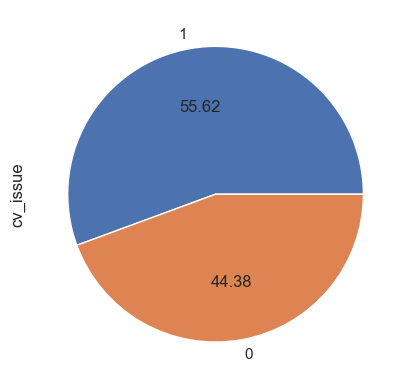

In [14]:
df_train["cv_issue"].value_counts().plot.pie(autopct='%.2f')

In [15]:
df_train.isnull().sum()

age                0
gender             0
chest_pain         0
resting_BP         0
cholesterol        0
fasting_BS         0
resting_ECG        0
max_HR             0
exercise_angina    0
old_peak           0
ST_slope           0
cv_issue           0
dtype: int64

In [16]:
df_train.dtypes

age                  int64
gender              object
chest_pain          object
resting_BP           int64
cholesterol          int64
fasting_BS           int64
resting_ECG         object
max_HR               int64
exercise_angina     object
old_peak           float64
ST_slope            object
cv_issue             int64
dtype: object

## Data Preparation

In [17]:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")


In [18]:
from pycaret.classification import *
clf1 = setup(data = df_train, target = 'cv_issue',categorical_features = ['gender','chest_pain','fasting_BS','resting_ECG','exercise_angina','ST_slope'],normalize = True)

,Description,Value
0,Session id,874
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(908, 12)"
4,Transformed data shape,"(908, 19)"
5,Transformed train set shape,"(635, 19)"
6,Transformed test set shape,"(273, 19)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,6


In [21]:
clf1.data.dtypes

age                    int8
gender             category
chest_pain         category
resting_BP            int32
cholesterol           int32
fasting_BS             int8
resting_ECG        category
max_HR                int32
exercise_angina    category
old_peak            float32
ST_slope           category
cv_issue               int8
dtype: object

In [22]:
clf1.get_config('dataset_transformed')

,age,gender,chest_pain_ATA,chest_pain_ASY,chest_pain_TA,chest_pain_NAP,resting_BP,cholesterol,fasting_BS,resting_ECG_Normal,resting_ECG_ST,resting_ECG_LVH,max_HR,exercise_angina,old_peak,ST_slope_Up,ST_slope_Flat,ST_slope_Down,cv_issue
99,-1.311853,0.519615,2.104127,-1.101156,-0.248743,-0.514723,-0.421479,0.619520,-0.536687,0.819178,-0.490137,-0.512275,0.258802,-0.811149,-0.831031,1.140493,-1.004736,-0.259281,0
84,0.281135,0.519615,-0.475256,0.908137,-0.248743,-0.514723,0.974802,0.112404,1.863285,0.819178,-0.490137,-0.512275,-0.494503,1.232818,0.124783,-0.876814,0.995287,-0.259281,1
204,0.281135,0.519615,2.104127,-1.101156,-0.248743,-0.514723,-0.142223,-0.150210,-0.536687,0.819178,-0.490137,-0.512275,-1.485695,-0.811149,-0.831031,1.140493,-1.004736,-0.259281,0
324,-0.780857,0.519615,-0.475256,0.908137,-0.248743,-0.514723,-1.817760,-1.816447,1.863285,-1.220736,2.040245,-0.512275,-0.177322,-0.811149,-3.316148,-0.876814,0.995287,-0.259281,1
235,-1.524251,0.519615,2.104127,-1.101156,-0.248743,-0.514723,-0.700735,-0.005319,-0.536687,0.819178,-0.490137,-0.512275,0.893165,1.232818,0.124783,-0.876814,0.995287,-0.259281,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.812131,0.519615,-0.475256,0.908137,-0.248743,-0.514723,-0.421479,-1.816447,-0.536687,0.819178,-0.490137,-0.512275,-1.287456,1.232818,-0.831031,-0.876814,-1.004736,3.856812,1
814,2.511318,0.519615,-0.475256,0.908137,-0.248743,-0.514723,-0.421479,0.936467,-0.536687,-1.220736,-0.490137,1.952077,0.972460,1.232818,-0.831031,1.140493,-1.004736,-0.259281,1
917,-1.630450,0.519615,-0.475256,-1.101156,-0.248743,1.942791,0.304587,-0.231710,-0.536687,0.819178,-0.490137,-0.512275,1.408585,-0.811149,-0.831031,1.140493,-1.004736,-0.259281,0
243,-1.099454,-1.924501,2.104127,-1.101156,-0.248743,-0.514723,-0.700735,0.592353,-0.536687,0.819178,-0.490137,-0.512275,-0.772037,-0.811149,-0.831031,1.140493,-1.004736,-0.259281,0


## Modelling

In [23]:
best = compare_models(n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8820,0.9282,0.9121,0.8822,0.8958,0.7596,0.7629,2.1910
rf,Random Forest Classifier,0.8661,0.9202,0.8977,0.8679,0.8814,0.7276,0.7310,1.6460
gbc,Gradient Boosting Classifier,0.8631,0.9176,0.8808,0.8764,0.8766,0.7225,0.7263,1.6440
ridge,Ridge Classifier,0.8551,0.0000,0.8805,0.8662,0.8709,0.7054,0.7113,1.5680
lda,Linear Discriminant Analysis,0.8551,0.9202,0.8805,0.8662,0.8709,0.7054,0.7113,1.5910
lr,Logistic Regression,0.8535,0.9199,0.8862,0.8577,0.8702,0.7019,0.7063,2.3920
et,Extra Trees Classifier,0.8473,0.9156,0.8664,0.8597,0.8619,0.6908,0.6933,1.6960
lightgbm,Light Gradient Boosting Machine,0.8458,0.9148,0.8809,0.8497,0.8641,0.6860,0.6884,1.6590
nb,Naive Bayes,0.8457,0.9102,0.8608,0.8643,0.8610,0.6872,0.6903,1.5300
ada,Ada Boost Classifier,0.8442,0.8960,0.8578,0.8636,0.8586,0.6845,0.6889,1.6320


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

## Best Model

In [24]:
best_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8438,0.8818,0.9143,0.8205,0.8649,0.6810,0.6866
1,0.8906,0.9576,0.8857,0.9118,0.8986,0.7800,0.7803
2,0.8750,0.9276,0.8889,0.8889,0.8889,0.7460,0.7460
3,0.8594,0.9464,0.9722,0.8140,0.8861,0.7061,0.7253
4,0.8906,0.9325,0.9167,0.8919,0.9041,0.7769,0.7773
5,0.8571,0.9163,0.8286,0.9062,0.8657,0.7138,0.7171
6,0.8889,0.9571,0.9429,0.8684,0.9041,0.7726,0.7763
7,0.9206,0.9082,0.9429,0.9167,0.9296,0.8387,0.8391
8,0.8571,0.9020,0.8857,0.8611,0.8732,0.7097,0.7100


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Hyperparameter Tuning

To ensure that the model generalize well to new_unseen data I set the fold-5. SO it will cross validate 5 times

In [25]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8281,0.8828,0.8857,0.8158,0.8493,0.6501,0.6531
1,0.9062,0.9596,0.8857,0.9394,0.9118,0.8119,0.8135
2,0.8594,0.9315,0.8889,0.8649,0.8767,0.7131,0.7135
3,0.8594,0.9623,0.9722,0.8140,0.8861,0.7061,0.7253
4,0.8750,0.9187,0.9167,0.8684,0.8919,0.7440,0.7455
5,0.8889,0.8990,0.8571,0.9375,0.8955,0.7774,0.7809
6,0.8571,0.9429,0.9143,0.8421,0.8767,0.7076,0.7110
7,0.9048,0.9112,0.9143,0.9143,0.9143,0.8071,0.8071
8,0.8730,0.9020,0.9143,0.8649,0.8889,0.7410,0.7426


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
best_params = tuned_model.get_params()
print(best_params)

{'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 874}


In [27]:
# evaluate_model(tuned_model)

## Feature Selection

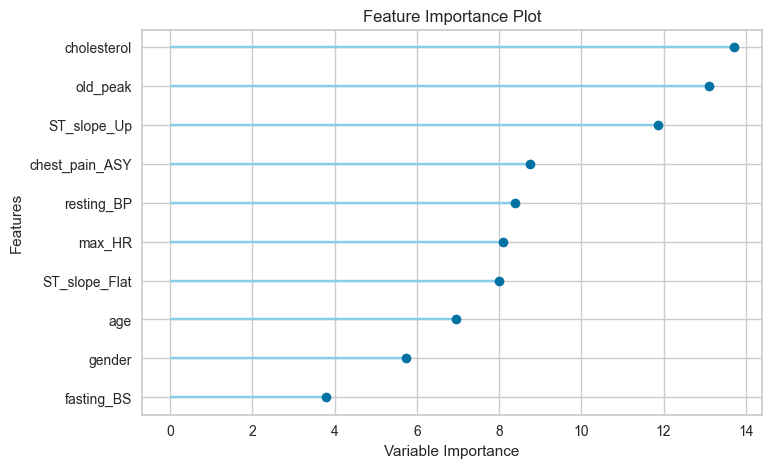

In [28]:
plot_model(tuned_model, plot='feature')

In [29]:
clf1 = setup(
    data=df_train,
    target='cv_issue',
    categorical_features=['gender', 'chest_pain', 'fasting_BS', 'resting_ECG', 'exercise_angina', 'ST_slope'],
    normalize=True,
    feature_selection = True,
    n_features_to_select=10,
    log_experiment=True
)

[LightGBM] [Info] Number of positive: 353, number of negative: 282
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 635, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555906 -> initscore=0.224561
[LightGBM] [Info] Start training from score 0.224561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Description,Value
0,Session id,2717
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(908, 12)"
4,Transformed data shape,"(908, 11)"
5,Transformed train set shape,"(635, 11)"
6,Transformed test set shape,"(273, 11)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,6


In [30]:
clf1.get_config('dataset_transformed')

,age,gender,chest_pain_ASY,resting_BP,cholesterol,resting_ECG_LVH,max_HR,exercise_angina,old_peak,ST_slope_Flat,cv_issue
72,-0.195565,0.517170,0.931476,-0.660611,-0.140929,-0.502459,0.549389,-0.811149,-0.837354,0.989036,1
371,1.284069,0.517170,0.931476,0.912862,-1.792776,-0.502459,-1.114122,1.232818,1.047843,0.989036,1
839,-1.992263,-1.933599,0.931476,0.283473,-0.131853,-0.502459,1.816827,-0.811149,0.482284,-1.011085,0
742,-0.195565,-1.933599,-1.073565,0.178575,-0.013864,1.990210,1.301930,-0.811149,-0.743094,0.989036,0
605,-0.301253,-1.933599,0.931476,-0.975305,0.548853,1.990210,-1.589412,-0.811149,0.105244,-1.011085,0
...,...,...,...,...,...,...,...,...,...,...,...
493,-0.301253,0.517170,-1.073565,0.231024,1.284015,-0.502459,-0.361581,1.232818,0.765064,0.989036,1
506,2.235263,0.517170,0.931476,0.178575,0.249342,-0.502459,-0.955693,1.232818,1.990442,0.989036,1
779,-1.146758,0.517170,0.931476,-1.185102,0.122277,-0.502459,0.985071,-0.811149,-0.837354,-1.011085,0
166,-0.406941,0.517170,0.931476,0.388371,0.303799,-0.502459,0.153315,1.232818,3.875640,0.989036,1


## Modelling(Repeating above steps after feature selection)

In [31]:
best = compare_models(n_select=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8755,0.9151,0.9095,0.8751,0.8909,0.7461,0.7495,1.9230
catboost,CatBoost Classifier,0.8739,0.9282,0.9094,0.8727,0.8893,0.7429,0.7475,2.0300
qda,Quadratic Discriminant Analysis,0.8661,0.9270,0.8953,0.8702,0.8814,0.7276,0.7309,1.7570
gbc,Gradient Boosting Classifier,0.8660,0.9280,0.8981,0.8696,0.8820,0.7270,0.7321,1.7890
rf,Random Forest Classifier,0.8613,0.9199,0.9067,0.8555,0.8793,0.7166,0.7208,1.9630
lr,Logistic Regression,0.8581,0.9219,0.8895,0.8635,0.8749,0.7110,0.7150,1.7800
xgboost,Extreme Gradient Boosting,0.8581,0.9127,0.8870,0.8674,0.8752,0.7108,0.7155,1.7390
nb,Naive Bayes,0.8565,0.9182,0.8840,0.8631,0.8726,0.7084,0.7107,1.8580
ridge,Ridge Classifier,0.8565,0.0000,0.8782,0.8697,0.8727,0.7082,0.7109,1.8310
lda,Linear Discriminant Analysis,0.8565,0.9220,0.8782,0.8697,0.8727,0.7082,0.7109,1.6810


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

In [32]:
#get the best model
best_model = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8906,0.9484,0.9167,0.8919,0.9041,0.7769,0.7773
1,0.8906,0.9643,0.9167,0.8919,0.9041,0.7769,0.7773
2,0.9062,0.9673,0.8889,0.9412,0.9143,0.8110,0.8126
3,0.8906,0.9468,0.8857,0.9118,0.8986,0.7800,0.7803
4,0.8438,0.9300,0.8571,0.8571,0.8571,0.6847,0.6847
5,0.8413,0.8571,0.9143,0.8205,0.8649,0.6739,0.6797
6,0.8730,0.9245,0.8857,0.8857,0.8857,0.7429,0.7429
7,0.8571,0.9092,1.0000,0.7955,0.8861,0.7011,0.7347
8,0.8571,0.9051,0.9143,0.8421,0.8767,0.7076,0.7110


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
#hyperparameter tuning
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9062,0.9444,0.9444,0.8947,0.9189,0.8080,0.8097
1,0.9219,0.9692,0.9167,0.9429,0.9296,0.8419,0.8423
2,0.9062,0.9702,0.8889,0.9412,0.9143,0.8110,0.8126
3,0.9062,0.9369,0.8857,0.9394,0.9118,0.8119,0.8135
4,0.8594,0.9232,0.8571,0.8824,0.8696,0.7171,0.7174
5,0.8571,0.8714,0.9143,0.8421,0.8767,0.7076,0.7110
6,0.8413,0.9122,0.8857,0.8378,0.8611,0.6763,0.6777
7,0.8254,0.8990,0.9714,0.7727,0.8608,0.6347,0.6651
8,0.8889,0.9143,0.9429,0.8684,0.9041,0.7726,0.7763


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Model Evaluation

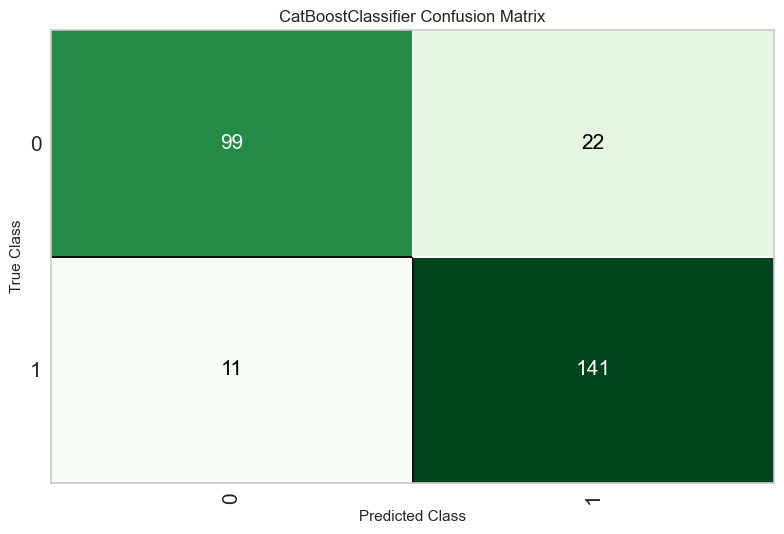

In [34]:
plot_model(tuned_model, plot='confusion_matrix')

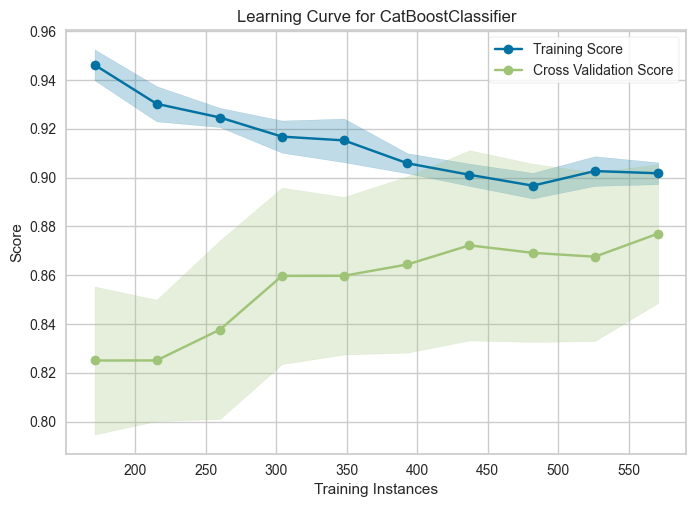

In [35]:
plot_model(tuned_model, plot='learning')

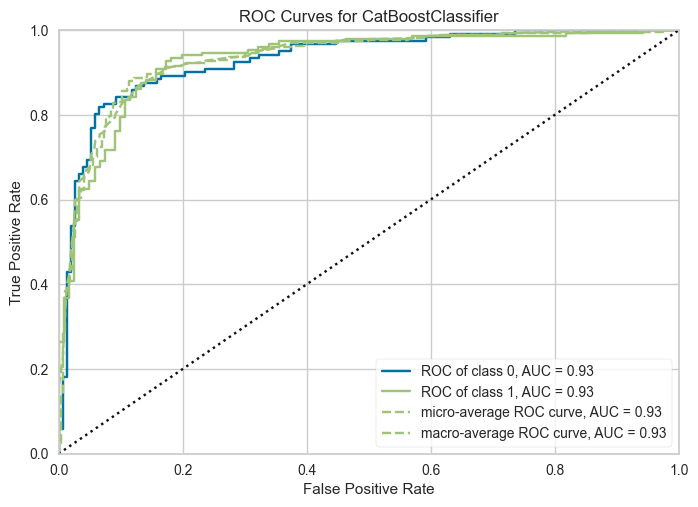

In [36]:
plot_model(tuned_model, plot='auc')

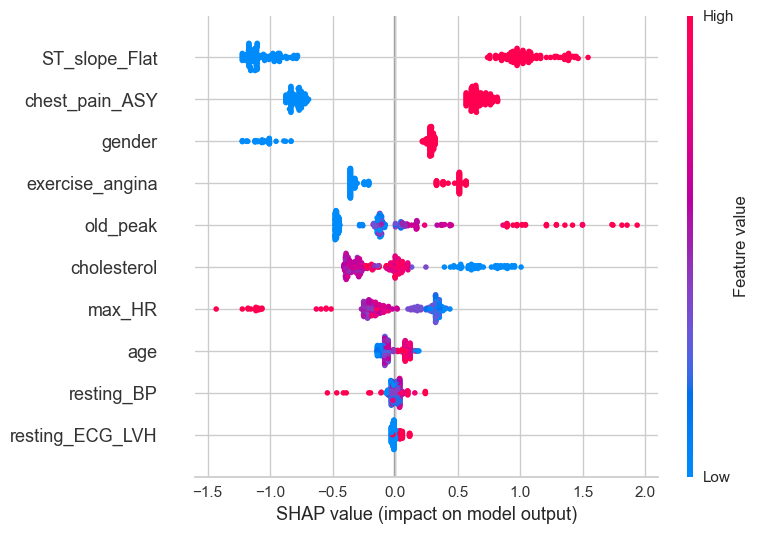

In [37]:
interpret_model(tuned_model)

## Test on unseen data

In [38]:
new_data_predictions = predict_model(tuned_model, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9000,1.0000,0.6667,1.0000,0.8000,0.7368,0.7638


## Ensemble Model

In [39]:
blended_model = blend_models(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.9425,0.8611,0.9118,0.8857,0.7480,0.7495
1,0.8906,0.9742,0.9167,0.8919,0.9041,0.7769,0.7773
2,0.9062,0.9772,0.8611,0.9688,0.9118,0.8125,0.8189
3,0.8750,0.9429,0.8857,0.8857,0.8857,0.7478,0.7478
4,0.8594,0.9360,0.8857,0.8611,0.8732,0.7154,0.7158
5,0.8571,0.8714,0.9429,0.8250,0.8800,0.7055,0.7151
6,0.8730,0.9265,0.9143,0.8649,0.8889,0.7410,0.7426
7,0.8571,0.8765,1.0000,0.7955,0.8861,0.7011,0.7347
8,0.9048,0.9102,0.9429,0.8919,0.9167,0.8058,0.8074


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [40]:
#tuning ensemble model
tuned_model = tune_model(blended_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8906,0.9415,0.8889,0.9143,0.9014,0.7787,0.7790
1,0.8906,0.9732,0.9167,0.8919,0.9041,0.7769,0.7773
2,0.9219,0.9762,0.8889,0.9697,0.9275,0.8431,0.8469
3,0.8906,0.9429,0.8857,0.9118,0.8986,0.7800,0.7803
4,0.8594,0.9360,0.8857,0.8611,0.8732,0.7154,0.7158
5,0.8730,0.8694,0.9429,0.8462,0.8919,0.7391,0.7455
6,0.8889,0.9276,0.9143,0.8889,0.9014,0.7742,0.7746
7,0.8571,0.8837,1.0000,0.7955,0.8861,0.7011,0.7347
8,0.9048,0.9163,0.9429,0.8919,0.9167,0.8058,0.8074


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [41]:
#testing ensemble model on unseen data
new_data_predictions = predict_model(tuned_model, data=df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9000,1.0000,0.6667,1.0000,0.8000,0.7368,0.7638


## Ensemble Learning Model Evaluation

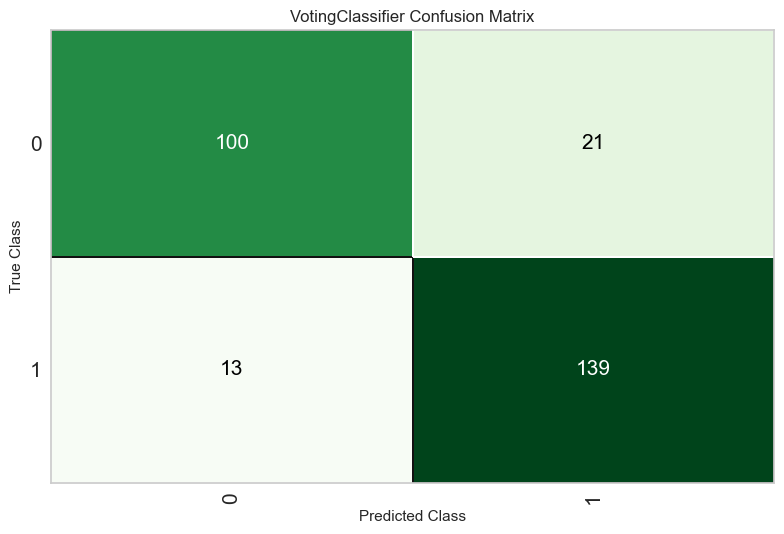

In [42]:
plot_model(tuned_model, plot='confusion_matrix')

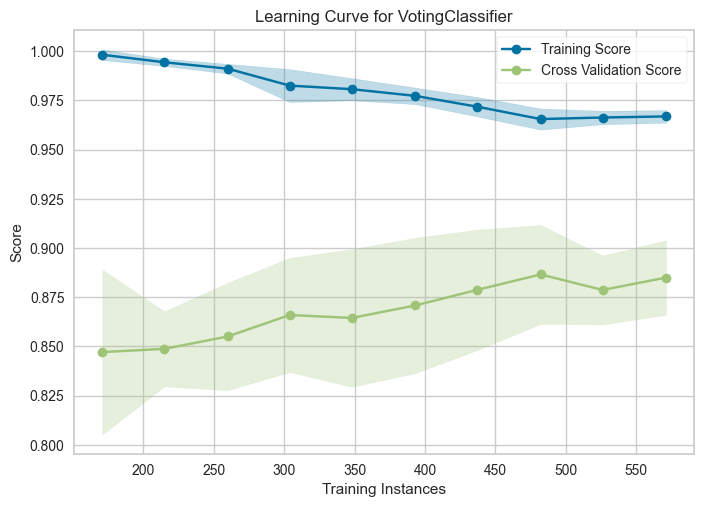

In [43]:
plot_model(tuned_model, plot='learning')

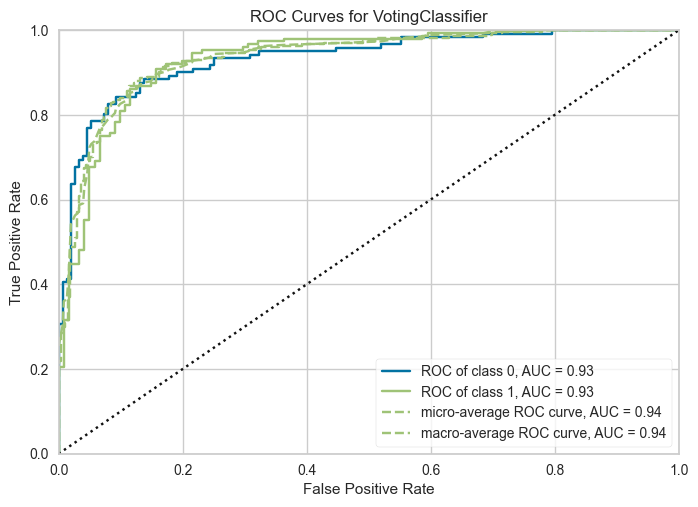

In [44]:
plot_model(tuned_model, plot='auc')

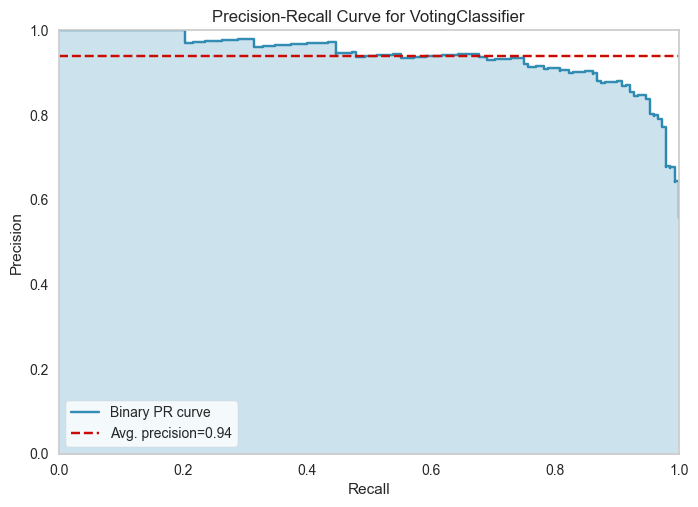

In [45]:
plot_model(tuned_model, plot='pr')


## Saving best Model

In [46]:
save_model(tuned_model, 'ensemble_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\siddarth\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'max_HR', 'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='depr...
                  VotingClassifier(estimators=[('K Neighbors Classifier',
                               

## Consume the model

In [50]:
import mlflow
logged_model = 'runs:/1adf88b5903d45ec9fd68193e532e3dd/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 1adf88b5903d45ec9fd68193e532e3dd